In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
df = pd.read_csv('mercedes_benz_sales_2020_2025.csv')

In [3]:
df.head()

,Model,Year,Region,Color,Fuel Type,Base Price (USD),Horsepower,Sales Volume,Turbo
0,A-Class,2020,Global,Yellow,Diesel,41265,252,1,Yes
1,A-Class,2020,Global,Black,Petrol,51023,249,1,No
2,A-Class,2020,Global,Grey,Petrol,72819,341,1,Yes
3,A-Class,2020,Global,Black,Petrol,62480,385,1,Yes
4,A-Class,2020,Global,White,Petrol,35189,337,1,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12132666 entries, 0 to 12132665
Data columns (total 9 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Model             object
 1   Year              int64 
 2   Region            object
 3   Color             object
 4   Fuel Type         object
 5   Base Price (USD)  int64 
 6   Horsepower        int64 
 7   Sales Volume      int64 
 8   Turbo             object
dtypes: int64(4), object(5)
memory usage: 833.1+ MB


In [5]:
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel Type', 'Base Price (USD)',
       'Horsepower', 'Sales Volume', 'Turbo'],
      dtype='object')

In [6]:
df.isna().sum()

Model               0
Year                0
Region              0
Color               0
Fuel Type           0
Base Price (USD)    0
Horsepower          0
Sales Volume        0
Turbo               0
dtype: int64

In [7]:
df.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
Year,12132666.0,2022.547598,1.658896,2020.0,2021.0,2023.0,2024.0,2025.0
Base Price (USD),12132666.0,104216.921812,67833.882158,35000.0,63462.0,83572.0,119920.0,411246.0
Horsepower,12132666.0,367.459360,119.544615,150.0,275.0,358.0,444.0,831.0
Sales Volume,12132666.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [8]:
df.select_dtypes('object', 'category').describe().T

,count,unique,top,freq
Model,12132666,17,GLC,2091045
Region,12132666,1,Global,12132666
Color,12132666,10,Black,3031663
Fuel Type,12132666,4,Petrol,5821366
Turbo,12132666,2,Yes,10371297


In [9]:
df.shape

(12132666, 9)

In [10]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12132666 entries, 0 to 12132665
Data columns (total 9 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Model             object
 1   Year              int64 
 2   Region            object
 3   Color             object
 4   Fuel Type         object
 5   Base Price (USD)  int64 
 6   Horsepower        int64 
 7   Sales Volume      int64 
 8   Turbo             object
dtypes: int64(4), object(5)
memory usage: 3.4 GB


In [16]:
df = df.drop('Sales Volume', axis=1)

## Clean data

In [11]:
df['Year'] = df['Year'].astype('category')

for column in df.select_dtypes('object').columns:
    df[column] = df[column].astype('category')

In [12]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12132666 entries, 0 to 12132665
Data columns (total 9 columns):
 #   Column            Dtype   
---  ------            -----   
 0   Model             category
 1   Year              category
 2   Region            category
 3   Color             category
 4   Fuel Type         category
 5   Base Price (USD)  int64   
 6   Horsepower        int64   
 7   Sales Volume      int64   
 8   Turbo             category
dtypes: category(6), int64(3)
memory usage: 347.1 MB


## EDA

<Axes: xlabel='Base Price (USD)', ylabel='Count'>

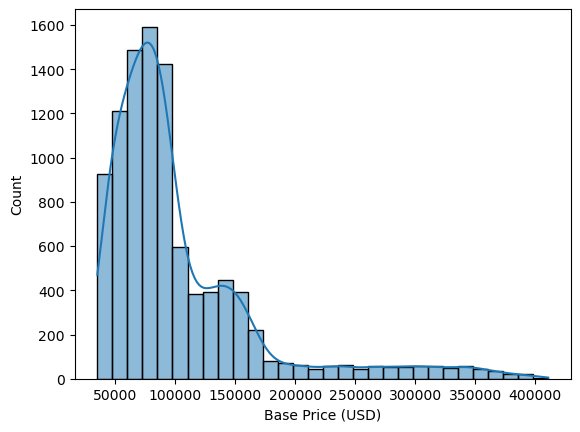

In [18]:
sns.histplot(
    x=df['Base Price (USD)'].sample(10000),
    kde=True,
    bins=30
)

<Axes: xlabel='Horsepower', ylabel='Count'>

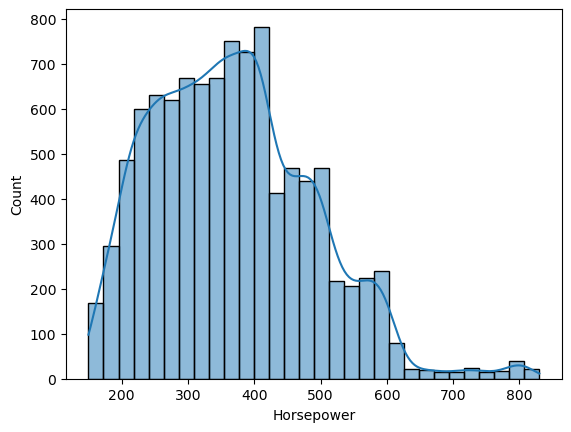

In [23]:
sns.histplot(
    x=df['Horsepower'].sample(10000),
    kde=True,
    bins=30
)

In [28]:
df.query('Horsepower >= 500')['Model'].value_counts()

Model
GLE         481040
E-Class     332699
S-Class     225564
GLS         197231
G-Class     112662
GLC          73749
AMG GT       61276
AMG E 63     53725
C-Class      53041
AMG S 63     45502
AMG C 63     26509
CLS           7251
A-Class          0
CLA              0
AMG A 45         0
GLB              0
GLA              0
Name: count, dtype: int64

In [29]:
df['Model'].value_counts()

Model
GLC         2091045
A-Class     1618309
GLE         1546092
C-Class     1504928
E-Class     1219554
GLA         1129266
GLB          883773
CLA          564731
GLS          493201
S-Class      374553
G-Class      217179
CLS          138621
AMG A 45     103309
AMG C 63      83158
AMG GT        65720
AMG E 63      53725
AMG S 63      45502
Name: count, dtype: int64

In [30]:
df['Year'].value_counts()

Year
2023    2301289
2024    2111247
2021    2039570
2022    2000390
2025    1903990
2020    1776180
Name: count, dtype: int64

In [ ]:
top_models = (
    df
    .copy()
    .groupby(['Model', 'Year'], as_index=False)
    .size()
    .rename(columns={'size': 'Count'})
)

top_models

C:\Users\mwisn\AppData\Local\Temp\ipykernel_9620\1795363884.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Model', 'Year'], as_index=False)


,Model,Year,Count
0,A-Class,2020,235182
1,A-Class,2021,256515
2,A-Class,2022,284181
3,A-Class,2023,313677
4,A-Class,2024,280248
...,...,...,...
97,S-Class,2021,62504
98,S-Class,2022,58052
99,S-Class,2023,73592
100,S-Class,2024,65509


In [51]:
top_models = (
    df
    .copy()
    .groupby(['Year', 'Model'], as_index=False)
    .size()
    .rename(columns={'size': 'Count'})
)

top_models

C:\Users\mwisn\AppData\Local\Temp\ipykernel_9620\3609358958.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Year', 'Model'], as_index=False)


,Year,Model,Count
0,2020,A-Class,235182
1,2020,AMG A 45,15542
2,2020,AMG C 63,11767
3,2020,AMG E 63,8253
4,2020,AMG GT,8861
...,...,...,...
97,2025,GLB,131599
98,2025,GLC,332775
99,2025,GLE,245922
100,2025,GLS,80064


In [ ]:
top_models.nlargest(3, columns='Count')

,Model,Year,Count
81,GLC,2023,394957
79,GLC,2021,370166
82,GLC,2024,347872


In [45]:
top_models['Count']

0      235182
1      256515
2      284181
3      313677
4      280248
        ...  
97      62504
98      58052
99      73592
100     65509
101     62754
Name: Count, Length: 102, dtype: int64

In [63]:
top_3_per_year = (
    top_models
    .groupby('Year')
    .apply(lambda x: x.nlargest(3, 'Count'))
)

top_3_per_year['Model'] = top_3_per_year['Model'].cat.remove_unused_categories()

C:\Users\mwisn\AppData\Local\Temp\ipykernel_9620\2654464207.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Year')
C:\Users\mwisn\AppData\Local\Temp\ipykernel_9620\2654464207.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'Count'))


<Figure size 1500x500 with 0 Axes>

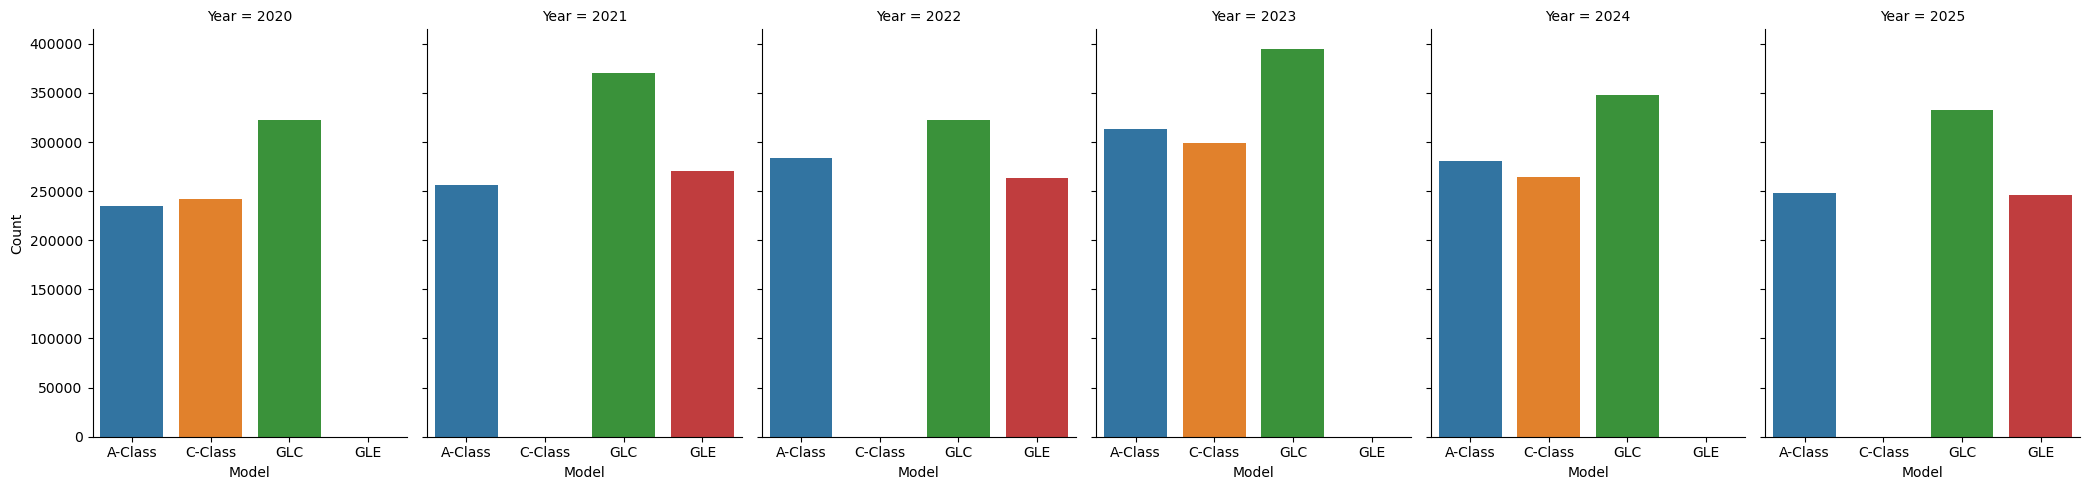

In [76]:
plt.figure(figsize=(15,5))

sns.catplot(
    top_3_per_year,
    x='Model',
    y='Count',
    col='Year',
    hue='Model',
    kind='bar',
    dodge=False,
    sharex=False,
    aspect=.7,
)

plt.tight_layout()